# Проект: Исследование стартапов

## Введение

### Цель и задачи

Данный проект проводится по запросу финансовой компании, предоставляющей льготные займы стартапам. Компания хочет войти на ивестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки бизнеса нужна информация.

**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
1. Загрузить данные и познакломиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - объединить данные;
    - проанализировать выбросы;
    - проанализировать сделки за 0-1 доллар;
    - провести анализ цен стартапов по категориям;
    - провести анализ количества раундов стартапа перед покупкой.
4. Сформулировать выводы по проведённому анализу.

### Данные

Для анализа поступили данные о сделках купли-продажи стартапов. Основные данные содержатся в 5 датасетах:

- `acquisition.csv` — информация о покупках одними компаниями других компаний;
- `company_and_rounds.csv` — информация о компаниях и раундах финансирования;
- `people.csv` — информация о сотрудниках;
- `education.csv` — информация об образовании сотрудника;
- `degrees.csv` — информация о типе образования сотрудника.

Также у нас имеются 2 дополнительных датасета:

- `fund.csv` - информация о фондах;
- `investment` - информация о раундах инвестирования.

### Описание датасета `acquisition.csv`

- `id` — идентификатор покупки;
- `acquiring_company_id` — идентификатор покупающей компании;
- `acquired_company_id `— идентификатор покупаемой компании;
- `term_code` — варианты расчёта;
- `price_amount` — сумма сделки;
- `acquired_at` — дата сделки.

### Описание датасета `company_and_rounds`

- `company ID` — идентификатор компании;
- `name` — название компании;
- `category code` — категория области деятельности компании;
- `status` — статус компании;
- `founded  at` — дата инвестирования;
- `closed  at` — дата закрытия компании;
- `domain` — официальный сайт компании;
- `network username` — ник компании в сети;
- `country code` — код страны компании;
- `investment rounds` — число инвестиционных раундов;
- `funding rounds` — число раундов финансирования;
- `funding total` — сумма финансирования;
- `milestones` — вехи финансирования;
- `funding round id` — идентификатор этапа финансирования;
- `company id` — идентификатор компании;
- `funded  at` — дата финансирования;
- `funding round type` — тип финансирования;
- `raised amount` — сумма финансирования;
- `pre money valuation` — предварительная денежная оценка;
- `participants` — число участников;
- `is first round` — является ли раунд первым;
- `is last round` — является раунд последним.

### Описание датасета `people`

- `id` — идентификатор сотрудника;
- `first_name` — имя сотрудника;
- `last_name` — фамилия сотрудника;
- `company_id` — идентификатор компании;
- `network_username` — ник в социальных сетях.

### Описание датасета `education`

- `id` — идентификатор записи об образовании;
- `person_id` — идентификатор работника;
- `instituition` — название учебного заведения;
- `graduated_at` — дата получения образования.

### Описание датасета `degrees`

- `id` — идентификатор записи;
- `object_id` — идентификатор сотрудника;
- `degree_type` — тип образования;
- `subject` — специальность.

### Описание датасета `fund`

- `id` — идентификатор фонда;
- `name` — название фонда;
- `category_code` — категория области деятельности компании;
- `founded_at` — дата создания фонда;
- `domain` — сайт фонда;
- `network_username` — ник фонда в сети;
- `country_code` — код страны фонда;
- `investment_rounds` — число инвестиционных раундов;
- `invested_companies` — число профинансированных компаний;
- `milestones` — вехи финансирования.

### Описание датасета `investment` 

- `id` — идентификатор этапа инвестирования;
- `funding_round_id` — идентификатор раунда инвестирования;
- `company_id` — индентификатор компании;
- `funding_round_type` — тип финансирования;
- `fund_id` — идентификатор фонда.

### Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn. Данные датасетов сохраним в следующих переменных:
- `acquisition` - `acq_df`
- `company_and_rounds` - `car_df`
- `people` - `peop_df`
- `education` - `edu_df`
- `degrees` - `deg_df`
- `fund` - `fund_df`
- `investment` - `inv_df`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Создаём переменную, в которую запишем общий путь к датасетам
path = ''

# Выгружаем данные таблицы acquisition в переменную acq_df
acq_df = pd.read_csv(path + 'acquisition.csv')

# Выгружаем данные таблицы company_and_rounds в переменную cr_df
cr_df = pd.read_csv(path + 'company_and_rounds.csv')

# Выгружаем данные таблицы people в переменную peop_df
peop_df = pd.read_csv(path + 'people.csv')

# Выгружаем данные таблицы education в переменную edu_df
edu_df = pd.read_csv(path + 'education.csv')

# Выгружаем данные таблицы degrees в переменную deg_df
deg_df = pd.read_csv(path + 'degrees.csv')

# Выгружаем данные таблицы education в переменную fund_df
fund_df = pd.read_csv(path + 'fund.csv')

# Выгружаем данные таблицы degrees в переменную inv_df
inv_df = pd.read_csv(path + 'investment.csv')

Познакомимся с данными датасета `acquisition.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим информацию о датафрейме
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.csv` содержит 6 столбцов и 9 407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду - snake case.
- Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` или `object`. Значения в столбцах `id`, `acquiring_company_id`, `acquired_company_id` и `price_amount` представлены целыми числами. Столбцы `term_code` и `acquired_at` содержат текстовые значения, в столбце `acquired_at` содержатся данные даты сделки. Поэтому необходимо будет изменить тип данных на datetime для столбца `acquired_at`.
- Пропуски содержатся только в столбцах `term_code` и `acquired_at`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `company_and_rounds.csv`. 

In [5]:
# Выводим первые строки датафрейма на экран
cr_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбца и 217 774 строки, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов необходимо привести к одному виду - snake case.
- Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `float64` или `object`. Значения в столбцах `company ID`, `investment rounds`, `funding rounds`, `funding total`, `milestones`, `funding round id`, `company id`, `raised amount`, `pre money valuation`, `participants`, `is first round` и `is last round` представлены вещественными числами. Столбцы `name`, `category code`, `status`, `founded  at`, `closed  at`, `domain`, `network username`, `country code`, `funded  at` и `funding round type` содержат текстовые значения, в столбцах `founded  at`, `closed  at` и `funded  at` содержатся данные дат инвестирования, закрытия и финансирования компаний. Поэтому для них необходимо будет изменить тип данных на datetime.
- Дублируются столбцы `company ID` и `company id`, однако второй столбец содержит около 75% пропусков. В дальнейшем разберёмся в причиной возникновения этого дублирования.
- Пропуски содержатся во всех столбцах. Поэтому могут возникнуть некоторые проблемы с анализом данных из этого датасета.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

В первую очередь приведём названия столбцов датасета к стилю `snake_case` для удобства дальнейшей работы. Названия должны быть написаны в нижнем регистре, а вместо пробелов — нижние подчёркивания. Но из-за дублирования столбцов с идентификатором компаний, добавим к столбцу `company ID` слово `full`, чтобы после преобразования названий к стилю `snake_case` эти столбцы не стали полными дубликатами по названию.

In [7]:
# Переименовываем столбец company  ID
cr_df = cr_df.rename(columns={'company  ID':'company  ID  full'})

# Переводим названия столбцов в нижний регистр
cr_df.columns = cr_df.columns.str.lower()

# Заменяем все пробелы на нижнее подчёркивание
cr_df.columns = cr_df.columns.str.replace('  ','_')

# Выводим обновлённые названия столбцов на экран
print(cr_df.columns)

Index(['company_id_full', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


Теперь познакомимся с данными датасета `people.csv`.

In [8]:
# Выводим первые строки датафрейма на экран
peop_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
# Выводим информацию о датафрейме
peop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226 709 строк, в которых представлена информация о сотрудниках.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду - snake case.
- Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64`, `float64` или `object`. Значения в столбце `id` представлены целыми числами. Значения в столбце `company_id` представлены вещественными числами. Столбцы `first_name`, `last_name` и `network_username` содержат текстовые значения, что соответствует действительности.
- Пропуски содержатся во всех столбцах, кроме `id`. Большое количество пропусков может отразиться на качестве данных для последующего анализа.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `education.csv`. 

In [10]:
# Выводим первые строки датафрейма на экран
edu_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [11]:
# Выводим информацию о датафрейме
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education.csv` содержит 4 столбца и 109 610 строк, в которых представлена информация об образовании сотрудника.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду - snake case.
- Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` или `object`. Значения в столбцах `id` и `person_id` представлены целыми числами. Столбцы `instituition` и `graduated_at` содержат текстовые значения. Данные столбца `graduated_at` необходимо будет привести к типу datetime, так как он содержит даты.
- Пропуски содержатся в столбцах `instituition` и `graduated_at`. Однако пропуски в этих столбцах не должны отразиться на качестве данных для последующего анализа.
- Опечатка в названии столбца `instituition`. Её необходимо исправить, переименовав столбец в `institution`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.



In [12]:
# Переименовываем столбец instituition
edu_df = edu_df.rename(columns={'instituition':'institution'})


Теперь познакомимся с данными датасета `degrees.csv`. 

In [13]:
# Выводим первые строки датафрейма на экран
deg_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [14]:
# Выводим информацию о датафрейме
deg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбца и 109 610 строк, в которых представлена информация о типе образования сотрудника.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду - snake case.
- Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` или `object`. Значения в столбце `id` представлены целыми числами. Столбцы `object_id`, `degree_type` и `subject` содержат текстовые значения, что соответствует действительности.
- Пропуски содержатся в столбцах `degree_type` и `subject`. Однако пропуски в этих столбцах не должны отразиться на качестве данных для последующего анализа.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `fund.csv`

In [15]:
# Выводим первые строки датафрейма на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [16]:
# Выводим информацию о датафрейме
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет `fund.csv` содержит 9 столбцов и 11 652 строки, в которых представлена информация о фондах.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду - snake case.
- Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` и `object`. Значения в столбце `id`, `investment_rounds`, `invested_companies ` и `milestones` представлены целыми числами. Столбцы `name`, `founded_at`, `domain`, `network_username` и `country_code`, содержат текстовые значения. Столбец `founded_at` содержит даты, соответственно необходимо будет превести его к типу datetime.
- Пропуски содержатся в столбцах `name`, `founded_at`, `domain`, `network_username`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `investment.csv`. 

In [17]:
# Выводим первые строки датафрейма на экран
inv_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [18]:
# Выводим информацию о датафрейме
inv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет `investment.csv` содержит 4 столбца и 61 403 строки, в которых представлена информация о раундах инвестирования.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду - snake case.
- Представленные данные содержат целочисленные значения и хранятся в типае данных `int64`.
- Датасет не содержит пропусков.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Первичное знакомство показывает, что данные хорошего качества — в них не большое количество пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. Настало время следующего этапа — смены типов и анализа пропусков.

---

Первичное знакомство показывает, что данные хорошего качества — они соответствуют описанию и выглядят корректными. Настало время следующего этапа — предобработки данных.

### 1.2. Смена типов и анализ пропусков


Для столбцов, кроторые хранят значения даты и времени (`acquired_at`, `founded_at`, `closed_at`, `funded_at` и `graduated_at`), произведём преобразование данных к типу `datetime`:

In [19]:
# Преобразовывает данные даты в датафрейме acq_df
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])

# Преобразовывает данные даты в датафрейме cr_df
cr_df['founded_at'] = pd.to_datetime(cr_df['founded_at'])
cr_df['closed_at'] = pd.to_datetime(cr_df['closed_at'])
cr_df['funded_at'] = pd.to_datetime(cr_df['funded_at'])

# Преобразовывает данные даты в датафрейме edu_df
edu_df['graduated_at'] = pd.to_datetime(edu_df['graduated_at'])

# Проведём глобальную настройку, чтобы цифры формата float вы водились с разделителем групп разрядов 
pd.set_option('display.float_format', '{:,.2f}'.format)

In [20]:
# Проверим полученные типы данных в изменённых столбцах
column_type = acq_df['acquired_at'].dtype
print(f'Тип столбца acquired_at: {column_type}')

column_type = cr_df['founded_at'].dtype
print(f'Тип столбца founded_at: {column_type}')

column_type = cr_df['closed_at'].dtype
print(f'Тип столбца closed_at: {column_type}')

column_type = cr_df['funded_at'].dtype
print(f'Тип столбца funded_at: {column_type}')

column_type = edu_df['graduated_at'].dtype
print(f'Тип столбца graduated_at: {column_type}')

Тип столбца acquired_at: datetime64[ns]
Тип столбца founded_at: datetime64[ns]
Тип столбца closed_at: datetime64[ns]
Тип столбца funded_at: datetime64[ns]
Тип столбца graduated_at: datetime64[ns]


Теперь оценим полноту данных, изучив пропуски в датафреймах.

In [21]:
# Выведем доли пропусков для каждого датафрейма
print('Доли пропусков в датафрейме acq_df:')
acq_df.isna().mean()

Доли пропусков в датафрейме acq_df:


id                     0.00
acquiring_company_id   0.00
acquired_company_id    0.00
term_code              0.81
price_amount           0.00
acquired_at            0.00
dtype: float64

Мы видим, что столбец `term_code` содержит очень больше количество пропусков - 80%. Но так как эти данные не влияют на наш дальнейший анализ, то предполагаем, что эти пропуски останутся без изменений.

Можем сделать вывод, что полноты данных в датафрейме acq_df достаточно.

In [22]:
print('Доли пропусков в датафрейме cr_df:')
cr_df.isna().mean()

Доли пропусков в датафрейме cr_df:


company_id_full       0.00
name                  0.00
category_code         0.34
status                0.00
founded_at            0.50
closed_at             0.98
domain                0.32
network_username      0.56
country_code          0.50
investment_rounds     0.00
funding_rounds        0.00
funding_total         0.00
milestones            0.00
funding_round_id      0.76
company_id            0.76
funded_at             0.76
funding_round_type    0.76
raised_amount         0.76
pre_money_valuation   0.76
participants          0.76
is_first_round        0.76
is_last_round         0.76
dtype: float64

По доле пропусков видим, что больше всего пропусков (около **75%**) содержится в столбцах:
- `funding  round  id`
- `company  id`
- `funded  at`
- `funding  round  type`
- `raised  amount`
- `pre  money  valuation`
- `participants`
- `is  first  round`
- `is  last  round`

Однако, как мы можем заметить, все эти столбцы содержат информацию о раундах финансирования. Также мы видим, что датафрейм `cr_df` содержит два одинаковых столбца с идентификатором компании. Из вышеперечисленных факторов модем сделать предположение, что ранее данные таблицы `company_and_rounds` хранились в двух разных таблицах (`company` и `rounds`). Из-за чего столбцы, содержащие информацию о раундах финансирования, при полном объединении с данными о компанпиях получили большое количество пропусков, а также дублирование столбца `company_id`. Поэтому дублированные столбцы и столбцы с большим количеством пропусков оставим до момента разделения таблиц.

In [23]:
print('Доли пропусков в датафрейме peop_df:')
peop_df.isna().mean()

Доли пропусков в датафрейме peop_df:


id                 0.00
first_name         0.00
last_name          0.00
company_id         0.85
network_username   0.83
dtype: float64

Датафрейм `peop_df` содержит **84%** пропусков в столбце `company_id` и **82%** в столбце `network_username`. Такие данные мы также не можем назвать полными для анализа. Поэтому предполагаем, что пропуски в данных необходимо будет обработать.

In [24]:
print('Доли пропусков в датафрейме edu_df:')
edu_df.isna().mean()

Доли пропусков в датафрейме edu_df:


id             0.00
person_id      0.00
institution    0.00
graduated_at   0.47
dtype: float64

Датафрейм `edu_df` содержит **47%** пропусков в столбце `graduated_at` . Такие данные мы также не можем назвать полными для анализа. Поэтому предполагаем, что пропуски необходимо будет обработать.

In [25]:
print('Доли пропусков в датафрейме deg_df:')
deg_df.isna().mean()

Доли пропусков в датафрейме deg_df:


id            0.00
object_id     0.00
degree_type   0.10
subject       0.26
dtype: float64

Датафрейм `deg_df` содержит **10%** пропусков в столбце `degree_type` и **25%** в столбце `subject`. Такие данные мы можем назвать относительно полными для анализа. Поэтому предполагаем, что пропуски в данных необходимо будет обработать.

### Промежуточные выводы после загрузки и анализа пропусков

На этом этап загрузки и анализа данных завершен. Предоставленные данные хорошего качества и требуют не так много действий по предобработке. 

В результате анализа данных были выполнены следующие действия:

- Скорректированы названия столбцов — их привели к стилю snake case;
- Изучены пропуски в данных. Больше всего пропусков обнаружилось в датасете `company_and_rounds`: 9 из 22 столбцов имеют более 75% пропусков, но объяснение этому мы уже предположили (ранее данные датасета хранились в двух разных таблицах). Поэтому их оставили как есть.

Теперь можем переходить к предобработке данных и предварительным исследованиям.

---

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [26]:
# Выделяем год финансирования в отдельный столбец
cr_df['year_funded'] = cr_df['funded_at'].dt.year.astype('Int64')

# Строим сводную таблицу
pivot_amount = pd.pivot_table(cr_df,
                              index='year_funded',
                              aggfunc={'raised_amount':'median','funding_rounds':'count'})

print(pivot_amount)

             funding_rounds  raised_amount
year_funded                               
1960                      9           0.00
1973                      1           0.00
1974                      2           0.00
1984                      3      41,000.00
1985                      1           0.00
1987                      2   1,250,000.00
1989                      1      15,000.00
1990                      1   1,000,000.00
1992                      1   2,000,000.00
1993                      2      62,500.00
1994                      2   6,700,000.00
1995                      7   2,000,000.00
1996                      7      12,500.00
1997                      9   3,300,000.00
1998                     29     100,000.00
1999                     76   2,000,000.00
2000                    125   4,200,000.00
2001                     95   3,000,000.00
2002                    115   4,200,000.00
2003                    154   3,000,000.00
2004                    286   5,000,000.00
2005       

In [27]:
# Фильтруем таблицу по условию: в году было более 50 раундов финансирования
filtered_pivot_amount = pivot_amount[pivot_amount['funding_rounds'] > 50]

print(filtered_pivot_amount)

             funding_rounds  raised_amount
year_funded                               
1999                     76   2,000,000.00
2000                    125   4,200,000.00
2001                     95   3,000,000.00
2002                    115   4,200,000.00
2003                    154   3,000,000.00
2004                    286   5,000,000.00
2005                   1624   5,500,000.00
2006                   2409   5,000,000.00
2007                   3220   3,973,320.00
2008                   3735   3,110,000.00
2009                   4112   2,000,000.00
2010                   6194   1,602,500.00
2011                   9162   1,200,000.00
2012                   9956   1,000,000.00
2013                  11042   1,200,000.00


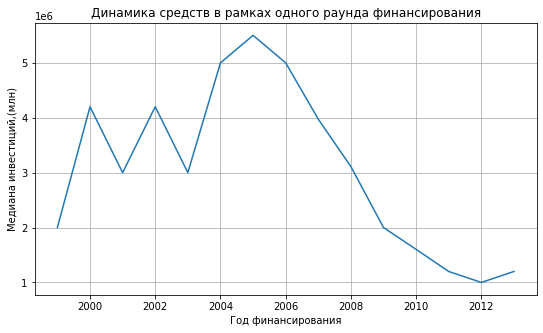

In [28]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 5))

# Строим линейный график дикамики общего числа раундов финансирования по годам
filtered_pivot_amount['raised_amount'].plot(
               kind='line', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title='Динамика средств в рамках одного раунда финансирования'
)

# Настраиваем оформление графика
plt.xlabel('Год финансирования')
plt.ylabel('Медиана инвестиций,(млн)')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Теперь, когда перед нами визуализированны данные, можем предоставить ответы на вопросы:

**В каком году типичный размер собранных в рамках одного раунда средств был максимален?**

В 2005 году зафиксирован максимальный типичный размер средств, собранных в рамках одного раунда

**Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?**

В 2013 году число раундов повысилось, а типичная сумма за раунд начала восстанавливаться после падения.


### 2.2. Люди и их образование

In [29]:
# Сначала подготовим датафреймы к объединению, удалив дубликаты
peop_df = peop_df.drop_duplicates('id')

edu_df = edu_df.drop_duplicates('id')

# Объединим датафреймы peop_df и edu_df с параметром left
# левой таблицей будет peop_df, чтобы сохранить все записи о сотрудниках
peop_edu_df = peop_df.merge(edu_df, how='left', left_on='id', right_on='person_id', suffixes = ('_people','_education'))

In [30]:
# Группируем данные по идентификатору компании company_id и считаем количество сотрудников
grouped_peop_edu = peop_edu_df.groupby('company_id')['id_people'].count().rename('count_peop')

# Объединяем датафреймы peop_edu_df и grouped_peop_edu
peop_edu_df = peop_edu_df.merge(grouped_peop_edu, left_on='company_id', right_index=True, suffixes=('_people','_education'))

peop_edu_df.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at,count_peop
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,84
3961,10430,Ruchi,Sanghvi,5.00,rsanghvi,"4,247.00","10,430.00",Carnegie Mellon University,NaT,84
3962,10430,Ruchi,Sanghvi,5.00,rsanghvi,"4,248.00","10,430.00",Carnegie Mellon University,NaT,84
5583,106199,Adam,Marchick,5.00,adammarstanford,"15,666.00","106,199.00",Stanford University,2002-01-01,84
7716,108814,Jimmy,Zhu,5.00,jyzhu,"16,050.00","108,814.00",Massachusetts Institute of Technology (MIT),NaT,84


Выведем на экран для каждого уникального количества сотрудников частоту их встречаемости. Отсортируем по убыванию частоты встречаемости. Тогда мы сможем определить удобные для нас корзины, на которые мы сможем разбить стартапы по категориям.

In [31]:
peop_edu_df['count_peop'].value_counts().sort_values(ascending=False)

1      14149
2       9470
3       5571
4       3324
5       2235
6       1554
7       1127
8        920
9        774
11       572
10       510
376      376
13       338
12       300
18       288
221      221
15       210
192      192
16       192
19       190
20       180
14       168
17       136
111      111
25       100
89        89
44        88
84        84
27        81
80        80
39        78
73        73
71        71
35        70
70        70
34        68
66        66
22        66
64        64
30        60
59        59
29        58
52        52
26        52
24        48
46        46
43        43
42        42
28        28
23        23
21        21
Name: count_peop, dtype: int64

Как мы видим, бОльшая часть стартапов имеет 1-2 сотрудников. Поэтому укажем для стартапов следующие категории:
- `1`
- `2`
- `3`
- `4-5`
- `6-10`
- `11-25`
- `26+`

In [32]:
# Для каждого сотрудника укажем категорию размера компании, в которй он работает
#bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')],
#labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

peop_edu_df['category_company'] = pd.cut(peop_edu_df['count_peop'], bins=[0, 1, 2, 3, 5, 10, 25, float('inf')], labels=['1', '2', '3', '4-5', '6-10', '11-25', '26+'])

peop_edu_df.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at,count_peop,category_company
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,84,26+
3961,10430,Ruchi,Sanghvi,5.00,rsanghvi,"4,247.00","10,430.00",Carnegie Mellon University,NaT,84,26+
3962,10430,Ruchi,Sanghvi,5.00,rsanghvi,"4,248.00","10,430.00",Carnegie Mellon University,NaT,84,26+
5583,106199,Adam,Marchick,5.00,adammarstanford,"15,666.00","106,199.00",Stanford University,2002-01-01,84,26+
7716,108814,Jimmy,Zhu,5.00,jyzhu,"16,050.00","108,814.00",Massachusetts Institute of Technology (MIT),NaT,84,26+


In [33]:
# Группируем по company_id
grouped_company = peop_edu_df.groupby('company_id').agg(share_no_info=('institution', lambda x: x.isna().mean()),
                                                        count_peop=('count_peop','first'),
                                                        category_company=('category_company','first'))

# Группируем по category_company и считаем средние значения
grouped_category = grouped_company.groupby('category_company')['share_no_info'].mean().reset_index()

#Сортируем полученные данные по столбцу share_no_info в порядке возрастания
grouped_category = grouped_category.sort_values(by='share_no_info')

print(grouped_category)

  category_company  share_no_info
3              26+           0.20
2                2           0.23
4                3           0.23
5              4-5           0.28
1            11-25           0.31
6             6-10           0.31
0                1           0.59


По проведённому анализу можем сделать вывод, что относительно полную информацию о сотрудниках имеют крупные стартапы (более 26 сотрудников) - **20%**, а больше всего пропусков об образовании сотрудников содержат иднивидуальные стартапы (1 сотрудник) - **59%**. Стартапы с минимальным количеством сотрудников могут показывать больше пропусков, возможно, из-за слабой отчётности, в то время, как более многочисленные стартапы имеют строгие HR-процессы.

Для выполнения данного задания возможно присоединить таблицу `degrees` по полю `object_id`, предварительно проверив ключевой столбец на дубликаты.

### 2.3. Объединять или не объединять — вот в чём вопрос

Столбец с именем `network_username` встречается в двух датафреймах: cr_df и peop_df. Проверим, дублируется ли для этих датафреймов информация в столбцах с таким названием.

In [34]:
# Уникальные значения поля network_username их датафрейма peop_df
people_username = set(peop_df['network_username'].dropna().unique())

# Уникальные значения поля network_username их датафрейма cr_df
company_username = set(cr_df['network_username'].dropna().unique())

# Пересечём полученные множества
intersect_username = people_username & company_username

# Выведем количество network_username из people_username
print(f'Количество уникальных network_username в people.csv: {len(people_username)}')

# Выведем количество network_username из people_username
print(f'Количество уникальных network_username в company_and_rounds.csv: {len(company_username)}')

# Найдём количество значений в пересечении
print(f'Количество общих уникальных значений у peop_df и cr_df: {len(intersect_username)}')

Количество уникальных network_username в people.csv: 38421
Количество уникальных network_username в company_and_rounds.csv: 79571
Количество общих уникальных значений у peop_df и cr_df: 2199


В результате мы получили, что в столбце `network_username` для датафреймов `peop_df` и `cr_df` значения дублируются. Таких значений — **2 199**.
Однако, если мы обратим внимание на количество уникальных значений в датафреймах `peop_df` и `cr_df` отдельно, то можем заметить, что они содержат 38 421 и 79 571 уникальных значений соответственно. В таком случае при объединении датафреймов по полю `network_username` с полным совпадением мы потеряем большое количество данных. А при объединении датафреймов с сохранением всех строк, мы получим большое количество пропущенных значений.

Но поле `network_username` также содержится в таблице `fund.csv`. Проверим пересечения с ней.

In [35]:
# Уникальные значения поля network_username их датафрейма fund_df
fund_username = set(fund_df['network_username'].dropna().unique())

# Выведем количество network_username из fund_username
print(f'Количество уникальных network_username в fund.csv: {len(fund_username)}')

# Пересечём полученные множества
intersect_username = people_username & fund_username

# Найдём количество значений в пересечении
print(f'Количество общих уникальных значений у peop_df и fund_df: {len(intersect_username)}')

# Пересечём полученные множества
intersect_username = company_username & fund_username

# Найдём количество значений в пересечении
print(f'Количество общих уникальных значений у company_df и fund_df: {len(intersect_username)}')

Количество уникальных network_username в fund.csv: 2098
Количество общих уникальных значений у peop_df и fund_df: 79
Количество общих уникальных значений у company_df и fund_df: 70


Таким образом, столбец `network_username` не стоит использовать для объединения датафреймов.


### 2.4. Проблемный датасет и причина возникновения пропусков


В датафрейме есть столбцы с логически повторяющимися названиями:  `company_id_full` и `company_id`, `funding_total` и `raised amount`. Ещё мы можем заметить, столбцы `funding_round_id`, `company_id`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` и `year_funded` содержат одинаковое количество пропущенных значений - **76%**. Это совпадение кажется довольно-таки странным. По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе. Тогда из вышеперечисленного мы смеем предположить, что данные таблицы `company_and_rounds` ранее хранились в двух разных таблицах. Одна таблица содержала информацию по компаниям, а вторая по раундам финансирования.

Разделим таблицу `company_and_rounds` на две отдельные: `company` и `rounds`.
В таблицу `company` войдут все столбцы до `milestones` включительно, а остальные мы передадим в таблицу `rounds`.

In [36]:
# Создаём датафрейм с данными компаний
company_df = cr_df[['company_id_full','name','category_code','status',
                    'founded_at','closed_at','domain','network_username',
                    'country_code','investment_rounds','funding_rounds','funding_total','milestones']]

# Удалим дубликаты строк в данных для компании,
# выберем столбец company_id_full как первичный ключ этой таблицы
company_df = company_df.drop_duplicates(subset=['company_id_full']).copy()

# Проверим полученный датафрейм на пропуски
company_df.isna().mean()

company_id_full     0.00
name                0.00
category_code       0.37
status              0.00
founded_at          0.54
closed_at           0.99
domain              0.36
network_username    0.59
country_code        0.55
investment_rounds   0.00
funding_rounds      0.00
funding_total       0.00
milestones          0.00
dtype: float64

In [37]:
# По аналогии создаём датафрейм с данными о раундах финансирования
rounds_df = cr_df[['funding_round_id','company_id','funded_at','funding_round_type','raised_amount',
                   'pre_money_valuation','participants','is_first_round','is_last_round','year_funded']]

# Удалим дубликаты строк в данных для раундов финансирования,
# выберем столбец funding_round_id как первичный ключ этой таблицы
rounds_df = rounds_df.drop_duplicates(subset=['funding_round_id']).copy()

# Проверим полученный датафрейм на пропуски
rounds_df.isna().mean()

funding_round_id      0.00
company_id            0.00
funded_at             0.00
funding_round_type    0.00
raised_amount         0.00
pre_money_valuation   0.00
participants          0.00
is_first_round        0.00
is_last_round         0.00
year_funded           0.00
dtype: float64

Мы получили два датафрейма: для компаний и для раундов финансирования. Но как мы можем заметить, получились пропуски в первичных ключах таблиц, поэтому обработаем их дополнительно.

In [38]:
# Удалим строки с пропусками в столбце company_id_full
company_df = company_df[~company_df['company_id_full'].isna()]

company_df = company_df.reset_index(drop=True)

# Переименуем столбец company_id_full в company_id
company_df = company_df.rename(columns={'company_id_full': 'company_id'})

# Проверим датафрейм на пропуски
company_df.isna().mean()

company_id          0.00
name                0.00
category_code       0.37
status              0.00
founded_at          0.54
closed_at           0.99
domain              0.36
network_username    0.59
country_code        0.55
investment_rounds   0.00
funding_rounds      0.00
funding_total       0.00
milestones          0.00
dtype: float64

In [39]:
# Удалим строки с пропусками в столбце funding_round_id
rounds_df = rounds_df[~rounds_df['funding_round_id'].isna()]

rounds_df = rounds_df.reset_index(drop=True)

# Проверим датафрейм на пропуски
rounds_df.isna().mean()

funding_round_id      0.00
company_id            0.00
funded_at             0.00
funding_round_type    0.00
raised_amount         0.00
pre_money_valuation   0.00
participants          0.00
is_first_round        0.00
is_last_round         0.00
year_funded           0.00
dtype: float64

Таким образом, нам удалось разделить датафрейм `company_and_rounds` на два отдельных датафрейма: `company` - с информацией о компаниях, и `rounds` - с информацией о раундах финансирования. Также мы подготовили датафреймы, сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки. Теперь будет удобно отобирать компании по параметрам и рассчитывать показатели из расчёта на одну компанию без промежуточных агрегаций.


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных


В качестве основы для объединённой таблицы возьмём датафрейм `company_df`. Отфильтруем его по условиям: `funding_rounds > 0` или `investment_rounds > 0` ИЛИ `status == acquired`.

In [40]:
# Фильтруем датафрейм company_df по условиям
filtered_company_df = company_df[(company_df['funding_rounds'] > 0) |
                                 (company_df['investment_rounds'] > 0) | 
                                 (company_df['status'] == 'acquired')]

# Проверим отфильтрованное количество компаний
filtered_company_df['company_id'].nunique()

40747

Теперь проверим полноту и корректность получившейся таблицы. Для этого выведем первые 5 строк таблицы, а также долю пропущенных значений.

In [41]:
filtered_company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
13,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00
18,"10,014.00",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00


In [42]:
print('Доли пропусков в датафрейме filtered_company_df:')
filtered_company_df.isna().mean()

Доли пропусков в датафрейме filtered_company_df:


company_id          0.00
name                0.00
category_code       0.13
status              0.00
founded_at          0.32
closed_at           0.95
domain              0.12
network_username    0.49
country_code        0.15
investment_rounds   0.00
funding_rounds      0.00
funding_total       0.00
milestones          0.00
dtype: float64

Таблица для дальнейшего анализа выглядит полной и содержит корректные данные.
Для объединения отсортируем таблицу `acquisition` в порядке возрастания по полю `acquired_at`, сгруппируем  по полю `acquired_company_id` и по полю `price_amount` найдём последнее значение.

In [43]:
# Сортируем датафрейм acq_df по возрастанию acquired_at
acq_df = acq_df.sort_values(by='acquired_at')

# Сгруппируем датафрейм по acquired_company_id,найдём последнее значение по полю price_amount
unique_aquisition_df = acq_df.groupby('acquired_company_id')['price_amount'].last().reset_index()

# Объединим датафреймы filtered_company_df и unique_aquisition_df
buy_company_df = unique_aquisition_df.merge(filtered_company_df, left_on='acquired_company_id', right_on='company_id', how='left')

Мы собрали необходимые для дальнейшего анализа данные и можем переходить к следующему пункту.


### 3.2. Анализ выбросов



Построим гистограмму для изучения выбросов.

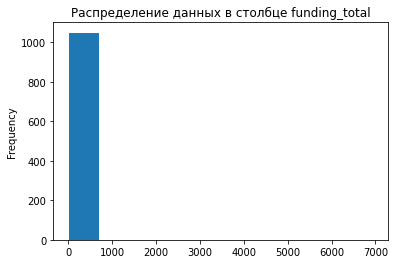

In [44]:
# Построим распределение данных для столбца `funding_total`
buy_company_df['funding_total'].value_counts().plot(kind='hist',
                                                   title='Распределение данных в столбце funding_total',
                                                   ylabel='Количество'
)

# Отображаем график
plt.show()

Как мы можем заметить на гистограмме всего один столбец с количеством компаний чуть больше 1000. Скорее всего данные имеют большие выбросы. Проверим нашу гипотезу и оценим статистические показатели. Для этого используем метод `describe()`:

In [45]:
print('Статистические показатели столбца funding_total:')
buy_company_df['funding_total'].describe()

Статистические показатели столбца funding_total:


count           9,247.00
mean        5,503,039.18
std        63,287,451.98
min                 0.00
25%                 0.00
50%                 0.00
75%                 0.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

На основе представленных статистических показателей столбца `funding_total`, можно сделать следующие выводы:

- Большое количество записей с нулевым финансированием: Значения 25%, 50% и 75% перцентилей равны 0. Это означает, что как минимум 75% компаний в выборке не получили внешнего финансирования (или их финансирование не было зафиксировано в данных). Это может указывать на то, что многие компании финансируются за счет собственных средств, являются стартапами на ранней стадии без привлечения инвестиций, или данные о финансировании неполные.

- Высокое среднее значение: Среднее значение (mean) в 5,5 миллиона долларов значительно выше медианы (которая равна 0 из-за того, что 50% перцентиль = 0). Это говорит о том, что в выборке есть несколько компаний с очень большими объемами финансирования, которые "вытягивают" среднее значение вверх.

- Очень большое стандартное отклонение: Стандартное отклонение (std) в 63 миллиона долларов очень велико по сравнению со средним значением. Это подтверждает наличие большого разброса в данных и сильного влияния выбросов.

- Огромный максимальный объем финансирования: Максимальное значение (max) в 5,7 миллиарда долларов подтверждает наличие выбросов. Этот один или несколько случаев экстремально высоких инвестиций сильно влияют на статистические показатели.

- Распределение данных: Судя по всему, распределение данных крайне неравномерное и смещено вправо. Большинство компаний получают относительно небольшое финансирование или не получают его вовсе, но есть небольшое количество компаний с огромными инвестициями.

Таким образом, типичным размером общего финансирования для одной компании является 0 долларов, а наличие финансирования в целом будет выбивающимся. И обычные способы нахождения типичных значений в нашем случае не подойдут.


### 3.3. Куплены забесплатно?



Выделим компании, проданные за 0 или 1 доллар и имеющие при это ненулевой общий объём финансирования, в отдельный датафрейм.

In [46]:
# Отфильтруем по компаниям, удовлетворяющим условиям
free_company_df = buy_company_df[((buy_company_df['price_amount'] == 1) | (buy_company_df['price_amount'] == 0)) 
                                 & ~(buy_company_df['funding_total']==0)]

# Выведем статистические показатели для таких компаний
print('Статистические показатели столбца funding_total:')
free_company_df['funding_total'].describe()

Статистические показатели столбца funding_total:


count           1,587.00
mean       17,874,684.03
std       145,533,575.06
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,400,000.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

Удовлетворяющих всем условиям компаний — **1 587**.

- Среднее значение (**17 млн**) сильно больше медианы (**6 млн**)
- Огромное стандартное отклоние — **145 млн**
- 75-ый процентиль (**15,4 млн**) сильно меньше максимального значения (**5,7 млрд**)

Таким образом, можем сделать вывод что `funding_total` имеет большие выбросы и смещённое вправо распределение данных.

Для рассчёта верхней и нижней границ выбросов для столбца `funding_total` выполним следующие вычисления:

- Рассчитать квартили Q1 и Q3.
- Рассчитать межквартильный размах IQR как разность между Q3 и Q1: IQR = Q3 – Q1.
- Вычислить нижний и верхний пороги для выбросов:
        Нижний порог = Q1 – 1.5 * IQR
        Верхний порог = Q3 + 1.5 * IQR

In [47]:
# Вычисляем квартили Q1 и Q3
Q1 = free_company_df['funding_total'].quantile(0.25)
Q3 = free_company_df['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем нижний порог для выбросов
lower_bound = Q1 - 1.5 * IQR

print(f'Нижний порог выбросов: {lower_bound}')

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')

Нижний порог выбросов: -18100000.0
Верхний порог выбросов: 35500000.0


In [48]:
# Выводим 0-й процентиль
print('0-й процентиль:')
print(free_company_df['funding_total'].quantile(0))
print()

# Выводим 91-й процентиль
print('91-й процентиль:')
print(free_company_df['funding_total'].quantile(0.91))
print()

# Выводим 92-й процентиль
print('92-й процентиль:')
print(free_company_df['funding_total'].quantile(0.92))

0-й процентиль:
3750.0

91-й процентиль:
35000000.0

92-й процентиль:
38938400.00000001


Нижняя граница по расчёту получилась отрицательная, из этого можем сделать вывод, что нижней границей будет минимальное значение — **3 750** долларов.
Верхняя граница является 92 процентилем и равна **35 500 000** долларов.


### 3.4. Цены стартапов по категориям


Построим сводную таблицу по категориям стартапов, для нахождения типично высоких цен возьмём медиану по полю `price_amount`, а для наибольшего разброса — разность между максимальным и минимальным значениями поля `price_amount`.

In [49]:
# Строим сводную таблицу по категориям стартапов
pivot_table = pd.pivot_table(buy_company_df, 
                             index='category_code',
                             aggfunc={
                                 'price_amount': [
                                     ('typical_price', 'median'),
                                     ('price_range', lambda x: x.max() - x.min())
                                 ]
                             })

# Упрощаем MultiIndex
pivot_table.columns = [col[1] for col in pivot_table.columns]

# Выводим получившуюся таблицу на экран
print(pivot_table)

                  price_range  typical_price
category_code                               
advertising        3100000000              0
analytics           263000000              0
automotive         5200000000       43000000
biotech           20000000000       12250000
cleantech          3750000000              0
consulting         5750000000              0
design                      0              0
ecommerce          1250000000              0
education           721000000              0
enterprise        13900000000              0
fashion             270000000              0
finance            4400000000         600000
games_video       10000000000              0
hardware           4600000000              0
health             5400000000              0
hospitality        2170000000       12500000
legal                       0              0
local                16140200              0
manufacturing      4050000000       72000000
medical             325000000              0
messaging 

В первую очередь мы сгруппировали наши данные по категориям стартапов.
Для нахождения типичных цен покупки стартапов мы использовали медиану поля `price_amount`.
Наибольший разброс - это разница между максимальным и минимальным значениями `price_amount` в каждой категории.
В получившейся сводной таблице мы имеем категории,для которых типичная цена довольно высокая, но наибольший разброс цен за стартап равен 0, и наоборот. Поэтому мы выберем только те категории, для которых типичная цена и наибольший разброс не равны 0. 

In [50]:
# Отфильтруем сводную таблицу по условиям: price_range > 0 и typical_price > 0
filter_pivot_table = pivot_table[(pivot_table['typical_price']>0) & (pivot_table['price_range']>0)]

# Сортируем в порядке убывания цен и разброса
sort_pivot_table = filter_pivot_table.sort_values(by=['typical_price','price_range'],ascending=False)

# Выводим на экран отсортированную таблицу
print(sort_pivot_table)

               price_range  typical_price
category_code                            
manufacturing   4050000000       72000000
real_estate     6850000000       50000000
automotive      5200000000       43000000
hospitality     2170000000       12500000
biotech        20000000000       12250000
finance         4400000000         600000


Таким образом мы получили ТОП-6 категорий с типично высокими ценами и наибольшим разбросом цен за стартап:
- производство,
- недвижимость,
- автомобилестроение,
- гостиничный бизнес,
- биотехнологии,
- финансы.


### 3.5. Сколько раундов продержится стартап перед покупкой



Построим сводную таблицу по статусам, а для нахождения типичного значения количества раундов возьмём медиану по полю `funding_rounds`.

In [51]:
# Строим сводную таблицу по категориям стартапов
pivot_table = pd.pivot_table(filtered_company_df, 
                             index='status',
                             aggfunc={
                                 'funding_rounds': [
                                     ('typical_count', 'median')
                                 ]
                             })

# Упрощаем MultiIndex
pivot_table.columns = [col[1] for col in pivot_table.columns]

# Выводим получившуюся таблицу на экран
print(pivot_table)

           typical_count
status                  
acquired            0.00
closed              1.00
ipo                 1.00
operating           1.00


Как мы видим, до момента покупки (статус `acquired`) стартап в каждом статусе имеет 1 раунд финансирования.

Теперь построим график, который отобразит среднее количестов раундов финансирования для каждого статуса:

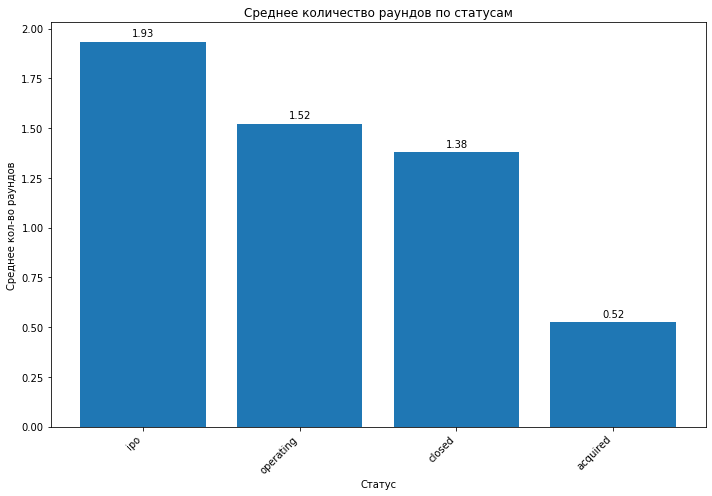

In [52]:
# Вычисляем среднее количество раундов для каждого статуса
mean_rounds_per_status = filtered_company_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

# Задаём размер графика
plt.figure(figsize=(10, 7))

# Создаем столбчатую диаграмму
plt.bar(mean_rounds_per_status.index, mean_rounds_per_status.values)

# Настраиваем график
plt.title('Среднее количество раундов по статусам')
plt.xlabel('Статус')
plt.ylabel('Среднее кол-во раундов')
plt.xticks(rotation=45, ha='right') 

# Добавляем подписи данных
for i, height in enumerate(mean_rounds_per_status.values):
    plt.annotate(f'{height:.2f}', 
                 xy=(mean_rounds_per_status.index[i], height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

По полученному графику можем сделать следующий выводы:

- Больше всего раундов финансирования стартапов происходит в статусе `ipo` - около 2 раундов (**1.93**)
- Меньше всего раундов финансирования стартапов осуществляется в статусе `acquired` - меньше 1 раунда (**0.52**)
- Статусы `operating` и `closed` имеют приблизительно одинаковое среднее количество раундов - 1 (**1.52** и  **1.38** соответственно).

Таким образом, при типичной покупке стартап при каждом статусе имеет 1 раунд финансирования, а самый популярный статус по среднему количеству раундов финансирования - `ipo`.

---

### Промежуточный вывод

В ходе исследовательского анализа мы отобрали около 40 тысяч компаний, которые удовлетворяют запросам заказчика и получили следующие результаты:
- для одной компании типичный размер общего финансирования равен нулю, а наличие какого-либо финансирования, отличного от нуля будет выбивающимся;
- в силу того, что статистические показатели общего размера финансирования (среднее значение и медиана) имеют слишком большой разрыв, нам **не подошли** типичные способы нахождения типичных значений;
- также мы нашли около 1.5 тысяч компаний, проданных за 0 или 1 доллар, но при этом имеющих не нулевую общую сумму финансирования; минимальная сумма финансирования таких компаний составила - **3 750** долларов, а максимальная - **35.5 млн** долларов;
- мы составили топ-6 категорий с типично высокими ценами и наибольшим разбросом цен за стартап и дополнительно добавили условие, чтобы цена за стратап и разброс цен были > 0:
    - производство
    - недвижимость
    - автомобилестроение
    - гостиничный бизнес
    - биотехнологии
    - финансы
- при типичной покупке стартап при каждом статусе имеет 1 раунд финансирования, а самый популярный статус по среднему количеству раундов финансирования - `ipo`.


## Шаг 4. Итоговый вывод и рекомендации

- В ходе исследования мы проанализировали 217 472 стартапа. Данные состояли из 7 датасетов. Мы провели предобработку данных: проверили корректность и полноту данных, сменили типы данных и проанализировали пропуски. 

- На этапе предобработки данных мы разделили датасет `company_and_rounds.csv` на два отдельных датасета `company` и `rounds`.

- Также нам удалось выяснить, что поле `network_username` не подходит для объединения датасетов `people`, `education` и `degrees`.

- Благодаря исследовательскому анализу мы смогли предоставить ответы на вопросы заказчика: 
    - определили, что типичный размер общего финансирования равен 0;
    - нашли около 1.5 тысяч компаний, проданных за 0 или 1 доллар;
    - составили топ-6 категорий стартапов с типично высокими ценами и наибольшим разбросом цен за стартап
    - определили, что при типичной покупке стартап при каждом статусе имеет 1 раунд финансирования, а самый популярный статус по среднему количеству раундов финансирования - `ipo`.

Полезнаыми для изучения могут быть данные `price_amount`, `category_code`, `funding rounds` и `funding total`.
Советуем обратить внимание на категории из представленного топа, так как они имеют самые типично высокие цены за продажу стартапов.
А также будет корректным отдельное изучение стартапов, проданных бесплатно, от стартапов, которые были проданные за n-ую сумму.